# Olivine projection iterator demo
#### K. Wong, Universit&#xE0; di Bologna, November 2023

This demo demostrates how to perform the olivine projections illustrated in Matthews et al. (2021) Figure 5 and Wong et al. (2022) Figure 4. The key equations are of Putirka (2008), and the process is described in detail in the supplement of Matthews et al. (2021).

We will import the Python script 'olivine_Fo_iterator.py' as this contains the key functions we will use.

In [1]:
import olivine_Fo_iterator as it
import matplotlib.pyplot as plt

This function will calculate pressure in GPa from depth in km.

In [2]:
def P_eq(depth, density=2800.0):
    """
    Quick code to convert depth of equilibration to pressure of equilibration.

    Parameters
    ----------
    depth : float
        Depth (km).
    density : float, optional
        Density (kgm-3). Default is 2800.0.

    Returns
    -------
    P_eq : float
        Pressure (GPa).

    """
    P_eq = depth * density * 1e-5
    return P_eq

Enter the conditions of olivine fractionation and evolution here.

In [3]:
eqPressure = P_eq(30.0)  # Uses the function above to find the pressure of olivine equilibration in GPa from a depth in km
T_crys_start = 1187.0  # Crystallisation temperature of our starting olivine in degC
Fo_start = 89.28  # Starting olivine Fo (mol%)

We can then run the iterator. The output is a numpy array, with the first row olivine Fo and the second row olivine crystallisation temperature at every corresponding Fo.

In [4]:
it.iteration?

Signature:
it.iteration(
    Fo_0,
    T_crys_0,
    P,
    fraction=0.0001,
    H2O=0.0,
    totAlkalis=5.0,
    SiO2=48.0,
    targetFo=91.0,
)
Docstring:
Numerical iterator to find best-fitting T for given liquid Mg and Fe in equilibrium with a
specific Fo, until a target Fo is achieved.

Parameters
----------
Fo_0 : float
    Olivine forsterite (mol%).
T_crys_0 : float
    Crystallisation temperature (degC) of olivine with forsterite of Fo_0.
P : float
    Pressure at which to perform iteration (GPa).
fraction : float
    Fraction of olivine to add at every iteration step. The default is 0.0001.
H2O : float, optional
    Water content of host magma (wt%). The default is 0.0.
totAlkalis : float, optional
    Total alkali content (Na2O + K2O) of host magma (wt%). The default is 5.0.
SiO2 : float, optional
    Silica content of host magma (wt%). The default is 48.0.
targetFo : float, optional
    Target olivine forsterite (mol%) to terminate iteration at. The default is 91.0.

Returns

In [5]:
it_data = it.iteration(Fo_start, T_crys_start, eqPressure)

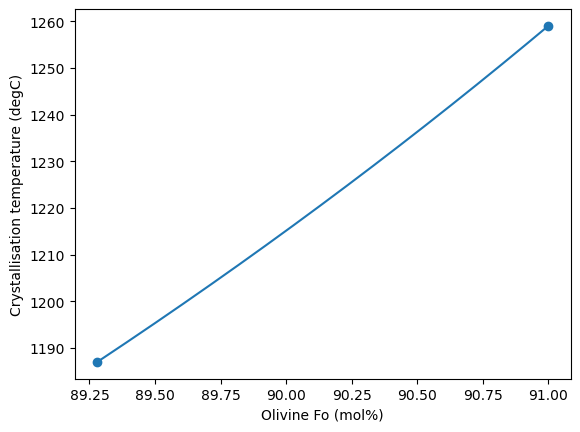

In [9]:
# Plot to confirm that all has worked:
fig1, ax1 = plt.subplots()
ax1.plot(it_data[0], it_data[1])
ax1.scatter([Fo_start, it_data[0][-1]], [T_crys_start, it_data[1][-1]])
ax1.set_xlabel('Olivine Fo (mol%)')
ax1.set_ylabel('Crystallisation temperature (degC)')
plt.show()

If this approach is used in your study, please cite the relevant equations in Putirka (2008) and Matthews et al. (2021).

## References

* Matthews, S., Wong, K., Shorttle, O., Edmonds, M., & Maclennan, J. (2021). Do olivine crystallization temperatures faithfully record mantle temperature variability? Geochemistry, Geophysics, Geosystems, 22(4), e2020GC009157. https://doi.org/10.1029/2020GC009157

* Putirka, K. D. (2008). Thermometers and Barometers for Volcanic Systems. Reviews in Mineralogy and Geochemistry, 69(1), 61–120. https://doi.org/10.2138/rmg.2008.69.3

* Wong, K., Ferguson, D., Matthews, S., Morgan, D., Tadesse, A. Z., Sinetebeb, Y., & Yirgu, G. (2022). Exploring rift geodynamics in Ethiopia through olivine-spinel Al-exchange thermometry and rare-earth element distributions. Earth and Planetary Science Letters, 597, 117820. https://doi.org/10.1016/j.epsl.2022.117820
